# Missing Values - Feature Engineering

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking the total missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The missing values in Age and Cabin column are an example of Missing Data Not at Random (MNAR) as these missing values have some relationship with the other values in the dataset

In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


The missing values for Embarked column are an example of MCAR(Missing comletely at random) as these missing values have no relationship with other values in the dataset

In [6]:
# Add a new column in the dataset. If the value is null make it as 1 otherwise 0
df['cabin_null'] = np.where(df['Cabin'].isnull(), 1,0)

In [7]:
# Find the percentage of missing values in cabin_null column
df['cabin_null'].mean()*100

77.10437710437711

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
# Finding the percentage of how much values are Null in Cabin column for survived and dead people
df.groupby('Survived')['cabin_null'].mean()*100

Survived
0    87.613843
1    60.233918
Name: cabin_null, dtype: float64

## Different Techniques to handle missing values

### 1. Mean/ Median/ Mode Imputation

In [10]:
df = pd.read_csv('titanic_train.csv', usecols = ['Age', 'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
# Find the percentage of missing values in data
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [12]:
# Function to replace the missing values of the given column with the mode given i.e. mean/median/mode
def impute_NaN(df, column, mode):
    if mode == median:
        df[column+"_median"] = df[column].fillna(median)
    elif mode == mean:
        df[column+"_mean"] = df[column].fillna(mean)

In [13]:
median = df.Age.median()
median

28.0

In [14]:
mean = df.Age.mean()
mean

29.69911764705882

In [15]:
impute_NaN(df, 'Age', median)

In [16]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
# Find out the standard deviation of these columns
print(df["Age"].std())
print(df["Age_median"].std())

14.526497332334044
13.019696550973194


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

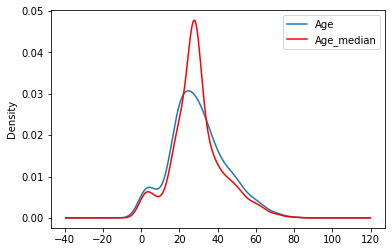

In [19]:
# Plot the distribution of Age and Age_median column
fig = plt.figure()
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc= 'best')

### 2. Random Sample Imputation

In [2]:
df = pd.read_csv("titanic_train.csv", usecols = ['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
df['Age'].isnull().sum()

177

In [7]:
# Pick any random value from age column to replace the NaN values
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
df['Age'].isnull().index

RangeIndex(start=0, stop=891, step=1)

In [9]:
def impute_NaN(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    # It will have random sample to fill the null values
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0)
    # Assign the index of null values to the index of random sample values to replace the Nan values
    random_sample.index = df[df[variable].isnull()].index
    # Replace the missing values with random sample values
    df.loc[df[variable].isnull(), variable+"_random"] = random_sample

In [10]:
median = df.Age.median()

In [11]:
median

28.0

In [12]:
impute_NaN(df, 'Age', median)

In [13]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [14]:
df['Age'].isnull().sum()

177

In [15]:
df['Age_median'].isnull().sum()

0

In [16]:
df['Age_random'].isnull().sum()

0

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

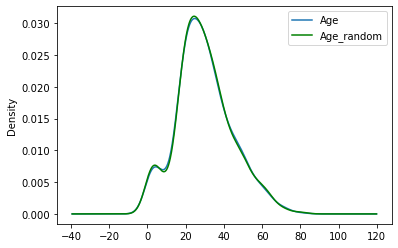

In [20]:
# Plot the distribution of Age and Age_random column
fig = plt.figure()
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_random.plot(kind='kde', ax=ax, color='green') 
# df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc= 'best')

### 3. Capturing NaN values with a new feature

In [21]:
df = pd.read_csv("titanic_train.csv", usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
# Create a new feature having the value 1 (where age is null) and 0 (where age is not null) 
df["Age_NaN"] = np.where(df['Age'].isnull(), 1, 0)

In [24]:
median = df['Age'].median()
median

28.0

In [29]:
# Replace the NaN value with median or we can also use random sample imputation
df['Age'].fillna(median, inplace = True)

In [30]:
df.head(50)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### 4. End of distribution Imputation

In [2]:
df = pd.read_csv("titanic_train.csv", usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


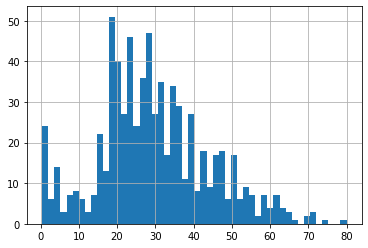

In [3]:
df.Age.hist(bins = 50)

In [4]:
# Pick up the value from the far end of the distribution (value after 3rd standard deviation)
extreme = df.Age.mean()+3*df.Age.std()

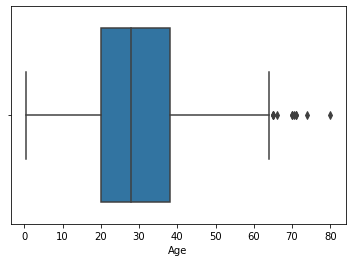

In [5]:
import seaborn as sns
# Checking outliers in the data
sns.boxplot('Age', data = df)

In [6]:
def impute_NaN(df, variable, median, extreme):
    df[variable+"_end_dist"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [7]:
impute_NaN(df, 'Age', df.Age.median(), extreme)

In [8]:
df.head(50)

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


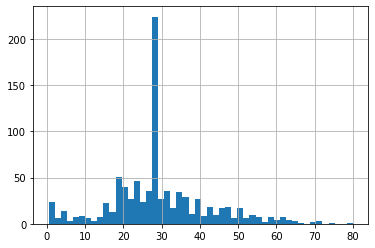

In [9]:
# Histogram of updated age column (with median)
df['Age'].hist(bins = 50)

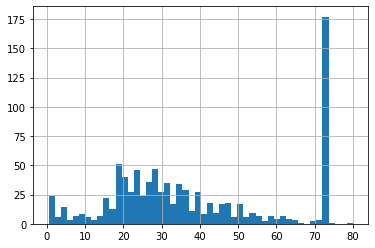

In [13]:
# Histogram of Age column after replacing NaN values
df['Age_end_dist'].hist(bins = 50)

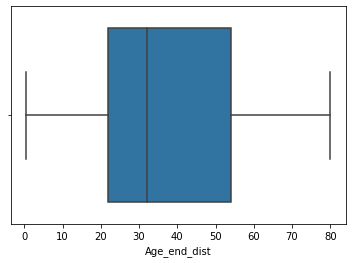

In [14]:
sns.boxplot('Age_end_dist', data = df)

<IPython.core.display.Javascript object>

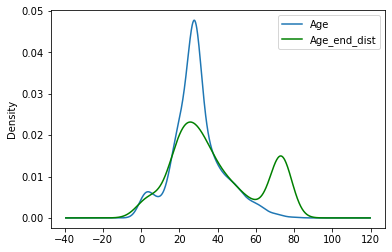

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_end_dist.plot(kind='kde', ax=ax, color='green') 
# df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc= 'best')

### 5. Arbitrary Value Imputation

In [2]:
df = pd.read_csv("titanic_train.csv", usecols = ['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


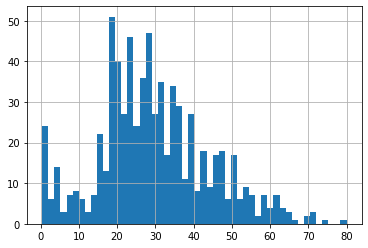

In [4]:
df['Age'].hist(bins = 50)

In [5]:
def impute_NaN(df, variable):
    df[variable+"_zero"] = df[variable].fillna(0)
    df[variable+"_hundred"] = df[variable].fillna(100)

In [6]:
impute_NaN(df, 'Age')

In [8]:
df.head(10)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


<IPython.core.display.Javascript object>

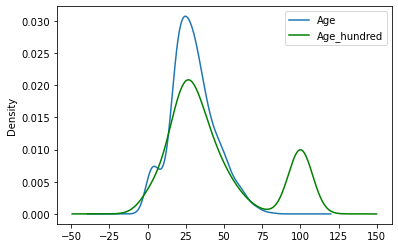

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_hundred.plot(kind='kde', ax=ax, color='green') 
# df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc= 'best')

## Handling Categorical Missing Values

### 1. Frequent Category Imputation

In [2]:
df = pd.read_csv('House_Price_Prediction_train.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [3]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [5]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [6]:
# Most frequent value can also be found like this
df['BsmtQual'].mode()[0]

'TA'

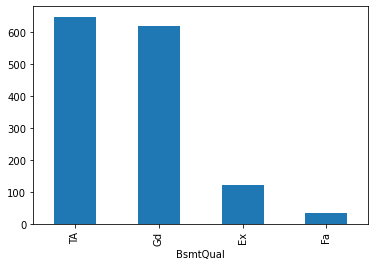

In [7]:
# Find out the most frequent category
df.groupby('BsmtQual')['BsmtQual'].count().sort_values(ascending = False).plot.bar()

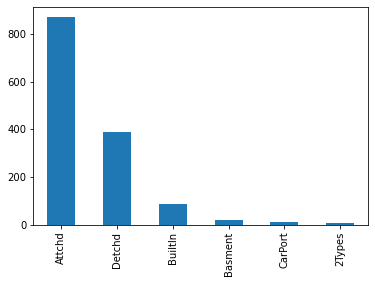

In [8]:
# most frequent category
df['GarageType'].value_counts().plot.bar()

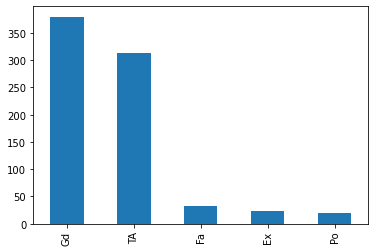

In [9]:
# most frequent category
df['FireplaceQu'].value_counts().plot.bar()

In [10]:
# Extracting the most frequent Category
df['FireplaceQu'].value_counts().index[0]

'Gd'

In [11]:
def impute_NaN(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace = True)

In [12]:
for feature in ['BsmtQual', 'GarageType', 'FireplaceQu']:
    impute_NaN(df, feature)

In [13]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [14]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### 2. Adding a variable to capture NaN

In [15]:
df = pd.read_csv('House_Price_Prediction_train.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [16]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [17]:
import numpy as np

In [18]:
df["BsmtQual_var"] = np.where(df["BsmtQual"].isnull(), 1, 0)

In [19]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [21]:
frequent_val = df["BsmtQual"].mode()[0]

In [23]:
df["BsmtQual"].fillna(frequent_val, inplace= True)

In [26]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [27]:
df["FireplaceQu_var"] = np.where(df["FireplaceQu"].isnull(), 1, 0)
frequent_val = df["FireplaceQu"].mode()[0]
df["FireplaceQu"].fillna(frequent_val, inplace= True)

In [28]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### 3. Suppose if we have more frequent categories, we just replace NaN with a new category

In [29]:
df = pd.read_csv('House_Price_Prediction_train.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [30]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [33]:
def impute_NaN(df, variable):
    df[variable+"_newVar"] = np.where(df[variable].isnull(),"Missing", df[variable])

In [34]:
for feature in ['BsmtQual', 'GarageType', 'FireplaceQu']:
    impute_NaN(df, feature)

In [35]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newVar,GarageType_newVar,FireplaceQu_newVar
0,Gd,NaN,Attchd,208500,Gd,Attchd,Missing
1,Gd,TA,Attchd,181500,Gd,Attchd,TA
2,Gd,TA,Attchd,223500,Gd,Attchd,TA
3,TA,Gd,Detchd,140000,TA,Detchd,Gd
4,Gd,TA,Attchd,250000,Gd,Attchd,TA


In [37]:
df.drop(['BsmtQual', 'GarageType', 'FireplaceQu'], axis = 1)

,SalePrice,BsmtQual_newVar,GarageType_newVar,FireplaceQu_newVar
0,208500,Gd,Attchd,Missing
1,181500,Gd,Attchd,TA
2,223500,Gd,Attchd,TA
3,140000,TA,Detchd,Gd
4,250000,Gd,Attchd,TA
...,...,...,...,...
1455,175000,Gd,Attchd,TA
1456,210000,Gd,Attchd,TA
1457,266500,TA,Attchd,Gd
1458,142125,TA,Attchd,Missing
